## Homeless Encampments in LA

##### Spring 2025
##### Amanda Alonzo
##### I513 Usable AI
##### Indiana University, Bloomington
 


## Park Distances - Visualizations, Correlations

#### Prerequisite: 3_parks_eda.ipynb

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import re
import numpy as np
import seaborn as sns
from scipy import stats


In [3]:
raw_data_path = "../Dataraw/"
annual_data_path = "../Datafiles/"
generated_data_path = "../Datagen/"

In [35]:
#this is generated at enf of 1_eda.ipynb
# it has some features added for dates and close time in days
#write to file with new features added for next notebook: visualization
df = pd.read_csv(generated_data_path+'homeless_camp_closed_2023_parks_ftr_eng_2.csv', low_memory=False)
df.head(1)

,SRNumber,CreatedDate,UpdatedDate,ActionTaken,Owner,RequestType,Status,RequestSource,CreatedByUserOrganization,MobileOS,...,SNRCT_y,RSTRM_y,TOTAL_GOOD_y,TOTAL_FAIR_y,TOTAL_POOR_y,CENTER_LAT_y,CENTER_LON_y,ZIP_y,Shape__Area_y,Shape__Length_y
0,1-3202726931,01/01/2023 08:26:17 AM,01/31/2023 01:44:42 PM,SR Created,LASAN,Homeless Encampment,Closed,Self Service,Self Service_SAN,NaN,...,0.0,1.0,2.0,8.0,0.0,34.037657,-118.178443,90063.0,476404.567383,2824.807047


In [64]:
df.dropna(subset = ['park_distance'], inplace=True)
df.park_distance.min()
df.park_distance.max()

np.float64(34.696842459179415)

In [58]:
# Correlation hypothesis
df['close_time_days_x'].corr(df['park_distance'])

np.float64(0.021607863427792164)

In [158]:
df['close_time_bins'] =  pd.cut(df['close_time_days_x'], bins=[10,50,100,200,300,1000], labels=[1,2,3,4,5 ])
#, labels=['Close Time Bin 1', 'Close Time Bin 2', 'Close Time Bin 3', 'Close Time Bin 4', 'Close Time Bin 5']


In [159]:
df.groupby("close_time_bins")['close_time_days_x'].max() 

C:\Users\amand\AppData\Local\Temp\ipykernel_13608\1050290432.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("close_time_bins")['close_time_days_x'].max()


close_time_bins
1     50.0
2    100.0
3    200.0
4    300.0
5    738.0
Name: close_time_days_x, dtype: float64

In [160]:
df.close_time_bins.value_counts()

close_time_bins
3    12628
2    12415
1    12229
4     4856
5     2621
Name: count, dtype: int64

In [149]:
df['park_distance_bins'] =  pd.cut(df['park_distance'], bins=[0,0.5,1,2,3,100], labels=[0,1,2,3,4  ])
#bins=[1, 20, 40, 60, 80, 100]

In [150]:

df.groupby("park_distance_bins")['park_distance'].max() 

C:\Users\amand\AppData\Local\Temp\ipykernel_13608\1331139139.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("park_distance_bins")['park_distance'].max()


park_distance_bins
0     0.499914
1     0.999980
2     1.999968
3     2.997069
4    34.696842
Name: park_distance, dtype: float64

In [151]:
df.groupby("park_distance_bins")['park_distance'].count() 

C:\Users\amand\AppData\Local\Temp\ipykernel_13608\2780922566.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("park_distance_bins")['park_distance'].count()


park_distance_bins
0    24119
1    21658
2    13528
3     2826
4      973
Name: park_distance, dtype: int64

In [161]:
# Correlation hypothesis
df['close_time_bins'].corr(df['park_distance_bins'])

np.float64(-0.01793077743576464)

In [153]:
df['close_time_bins'].value_counts()

close_time_bins
1    50619
2     9657
3     2469
4      250
5       84
Name: count, dtype: int64

## Feature Engineering - Numeric

In [45]:
df['is_county_ind'] = df.apply(lambda row: row['IS_COUNTY']=='No', axis=1)
df['is_county_ind']  = df['is_county_ind'].replace(True, 1)
df['is_county_ind']  = df['is_county_ind'].replace(False, 0)
df['is_county_ind'].value_counts()

C:\Users\amand\AppData\Local\Temp\ipykernel_13608\4217344738.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_county_ind']  = df['is_county_ind'].replace(False, 0)


is_county_ind
1    61881
0     1665
Name: count, dtype: int64

In [162]:
df['close_time_bins'].corr(df['is_county_ind'])

np.float64(0.017676527082203155)

In [163]:
df['park_distance_bins'].corr(df['is_county_ind'])

np.float64(-0.09707685931736931)

In [49]:
df.groupby("is_county_ind").count() 

,SRNumber,CreatedDate,UpdatedDate,ActionTaken,Owner,RequestType,Status,RequestSource,CreatedByUserOrganization,MobileOS,...,RSTRM_y,TOTAL_GOOD_y,TOTAL_FAIR_y,TOTAL_POOR_y,CENTER_LAT_y,CENTER_LON_y,ZIP_y,Shape__Area_y,Shape__Length_y,close_time_bins
is_county_ind,,,,,,,,,,,,,,,,,,,,,
0,1665,1665,1665,1665,1665,1665,1665,1665,1665,579,...,1223,1223,1223,1223,1223,1223,1223,1223,1223,1664
1,61881,61881,61881,61881,61881,61881,61881,61881,61881,32751,...,61881,61881,61881,61881,61881,61881,61867,61881,61881,61857


## Correlation Visualizations

In [164]:
numeric_variables = df.select_dtypes(include = [ np.int64])
#numeric_variables = numeric_variables.loc[:,'close_time_bins':'is_south_la']
numeric_variables.head(1)  

,CreatedDate_YR_x,is_east_la_x,is_north_valley_x,is_south_la_x,is_west_la_x,is_central_x,is_harbor_x,is_south_valley_x,CreatedDate_YR_y,is_east_la_y,is_north_valley_y,is_south_la_y,is_west_la_y,is_central_y,is_harbor_y,is_south_valley_y,is_county_ind
0,2023,1,0,0,0,0,0,0,2023,1,0,0,0,0,0,0,0


In [165]:
type(df['is_harbor_x'][0])
type(df['close_time_bins'][0]) #== np.int64
numeric_variables['close_time_bins' ] = df['close_time_bins']
numeric_variables['park_distance_bins' ] = df['park_distance_bins']

In [166]:
numeric_variables= numeric_variables.drop(['CreatedDate_YR_y', 'is_east_la_y',
       'is_north_valley_y', 'is_south_la_y', 'is_west_la_y', 'is_central_y',
       'is_harbor_y', 'is_south_valley_y','CreatedDate_YR_x'], axis=1)

In [167]:
#numeric_variables= numeric_variables.drop(['CreatedDate_YR_x'], axis=1)

In [168]:
numeric_variables.columns

Index(['is_east_la_x', 'is_north_valley_x', 'is_south_la_x', 'is_west_la_x',
       'is_central_x', 'is_harbor_x', 'is_south_valley_x', 'is_county_ind',
       'close_time_bins', 'park_distance_bins'],
      dtype='object')

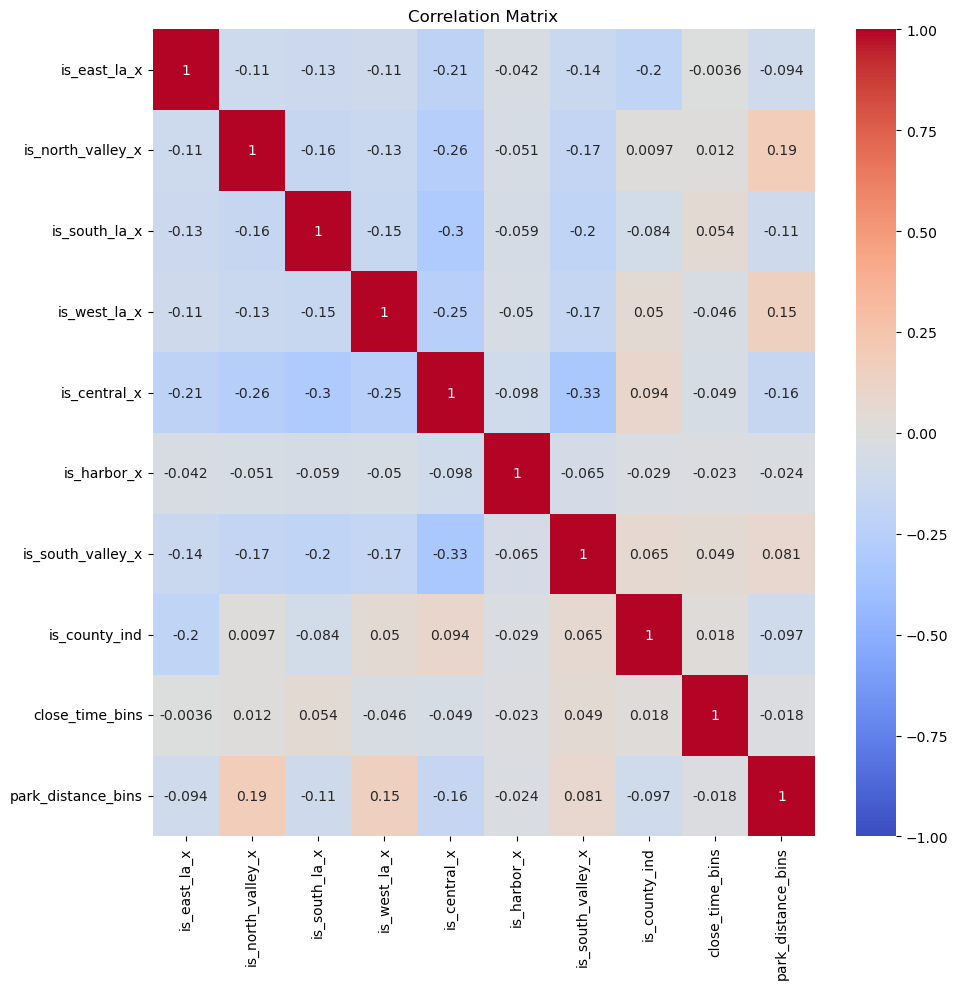

In [171]:
# Correlation heatmap
correlation_table = numeric_variables.corr()
correlation_table

# Create heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_table, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

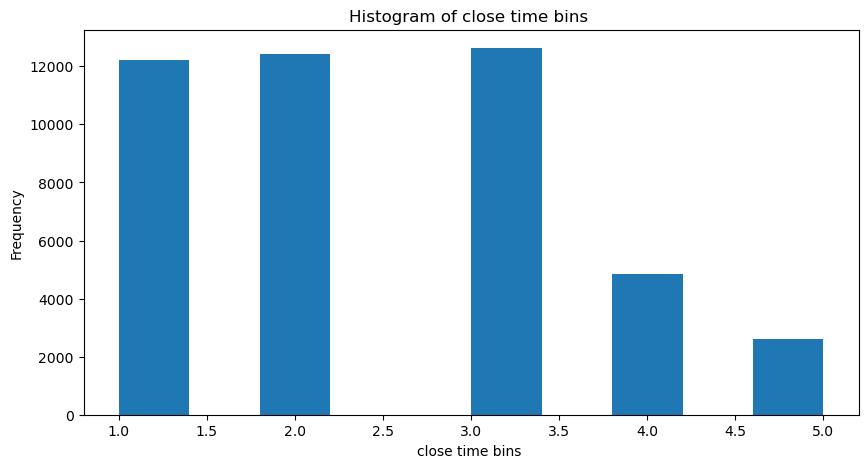

In [172]:
# close time bins
fig = plt.figure(figsize=(10, 5))
plt.hist(df['close_time_bins'] )
plt.xlabel('close time bins ')
plt.ylabel('Frequency')
plt.title('Histogram of close time bins ')
#plt.tight_layout()
plt.show()

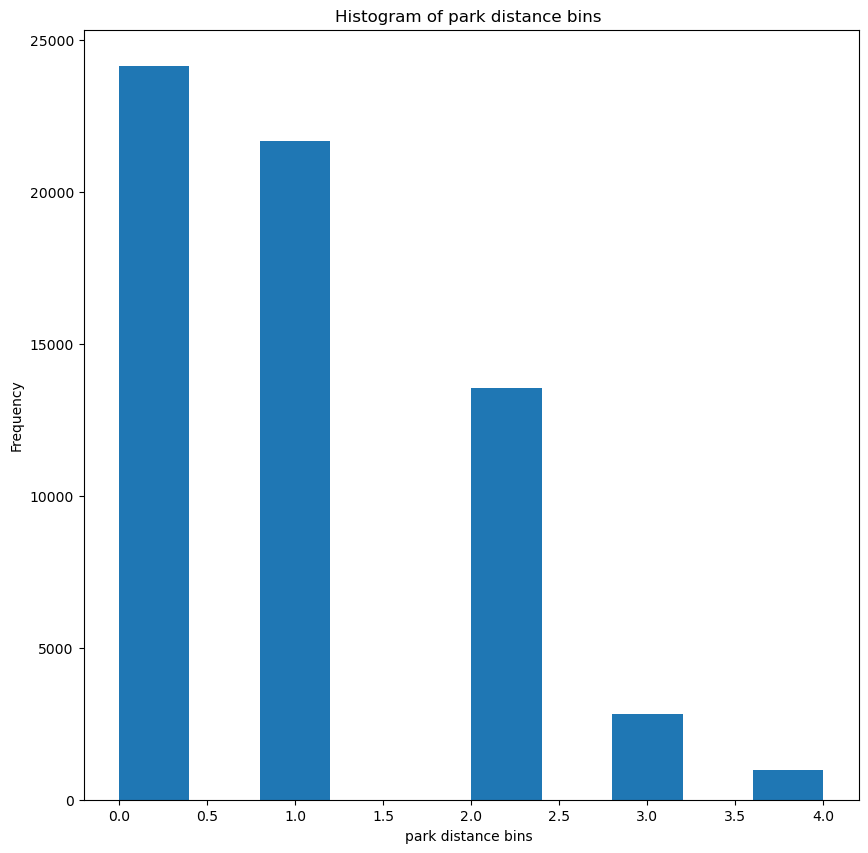

In [174]:
# park distance bins
fig = plt.figure(figsize=(10,10))
plt.hist(df['park_distance_bins'] )
plt.xlabel('park distance bins ')
plt.ylabel('Frequency')
plt.title('Histogram of park distance bins ')
#plt.tight_layout()
plt.show()

In [190]:

# plot  
plt.figure(figsize=(5, 5))
counts = df.groupby("PARK_LBL")["PARK_LBL"].count()
counts = counts.sort_values(ascending=False)
counts.min(), counts.mean(), counts.max()
counts.head(1).values

array([2495])

<Figure size 500x500 with 0 Axes>

In [195]:
counts[counts> 500].size

27

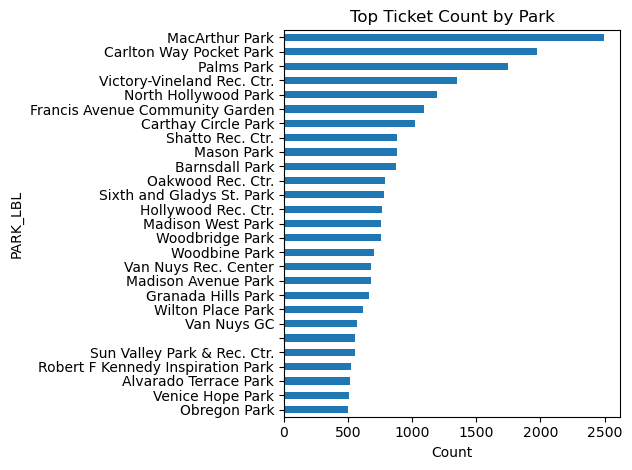

In [196]:
top_counts = counts[counts> 500] 
ax = top_counts.plot(kind="barh")
plt.xlabel('Count')
plt.title('Top Ticket Count by Park')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

In [221]:
df.groupby("park_distance_bins")["park_distance"].min(),df.groupby("park_distance_bins")["park_distance"].max()

C:\Users\amand\AppData\Local\Temp\ipykernel_13608\838882862.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("park_distance_bins")["park_distance"].min(),df.groupby("park_distance_bins")["park_distance"].max()


(park_distance_bins
 0    0.004306
 1    0.500023
 2    1.000043
 3    2.000252
 4    3.002212
 Name: park_distance, dtype: float64,
 park_distance_bins
 0     0.499914
 1     0.999980
 2     1.999968
 3     2.997069
 4    34.696842
 Name: park_distance, dtype: float64)

In [215]:
df_park_close = df[ df['park_distance_bins']==0]
# plot  
plt.figure(figsize=(5, 5))
counts = df_park_close.groupby("PARK_LBL")["PARK_LBL"].count()
counts = counts.sort_values(ascending=False)
counts.min(), counts.mean(), counts.max()
#counts.head(1).values

(np.int64(1), np.float64(48.141716566866265), np.int64(2217))

<Figure size 500x500 with 0 Axes>

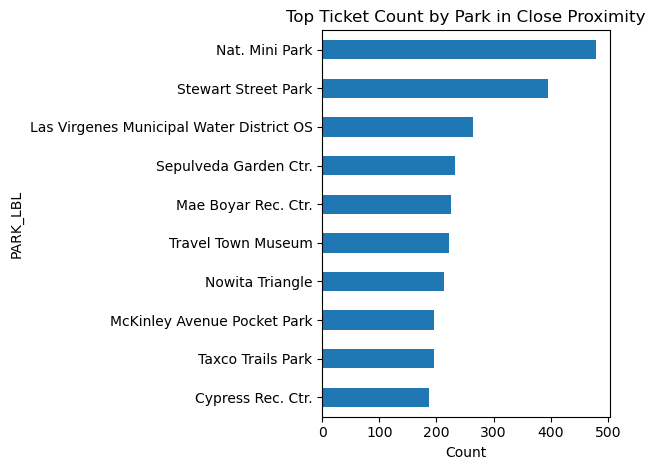

In [219]:
top_counts = counts[:10,] 
ax = top_counts.plot(kind="barh")
plt.xlabel('Count')
plt.title('Top Ticket Count by Park in Close Proximity (<0.5 KM)')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

In [216]:

# plot  
plt.figure(figsize=(5, 5))
counts = df.groupby("PARK_LBL")["close_time_days_x"].mean()
counts = counts.sort_values(ascending=False)
counts.min(), counts.mean(), counts.max()
#counts.head(1).values

(np.float64(1.0), np.float64(70.87803476943911), np.float64(479.0))

<Figure size 500x500 with 0 Axes>

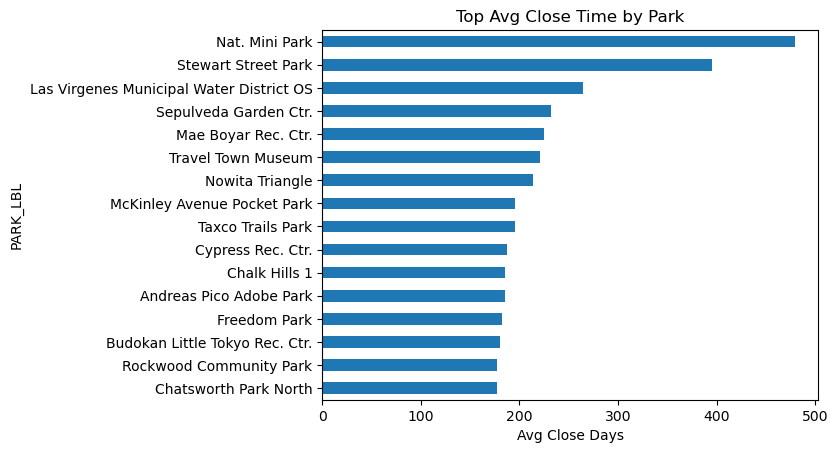

In [206]:
top_counts = counts[counts> 175] 
ax = top_counts.plot(kind="barh")
plt.xlabel('Avg Close Days')
plt.title('Top Avg Close Time by Park')
ax.invert_yaxis()
#plt.tight_layout()
plt.show()

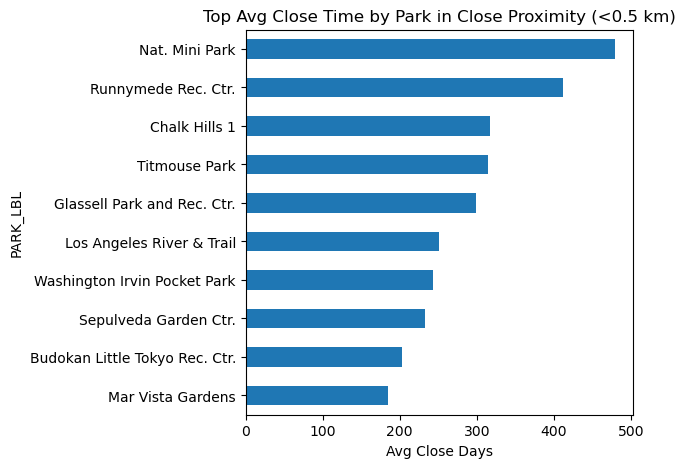

In [222]:

# plot  
plt.figure(figsize=(5, 5))
counts = df_park_close.groupby("PARK_LBL")["close_time_days_x"].mean()
counts = counts.sort_values(ascending=False)
counts.min(), counts.mean(), counts.max()
#counts.head(1).values
top_counts = counts[:10,] 
ax = top_counts.plot(kind="barh")
plt.xlabel('Avg Close Days')
plt.title('Top Avg Close Time by Park in Close Proximity (<0.5 km)')
ax.invert_yaxis()
#plt.tight_layout()
plt.show()

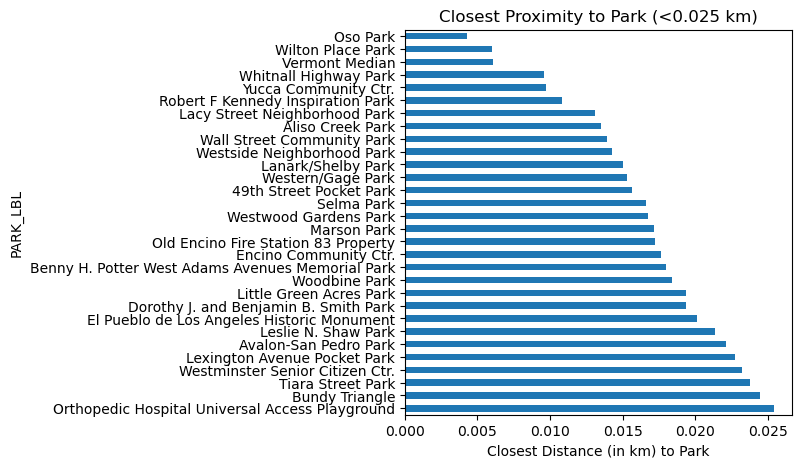

In [230]:

# plot  
plt.figure(figsize=(5, 5))
counts = df_park_close.groupby("PARK_LBL")["park_distance"].min()
counts = counts.sort_values(ascending=True)

top_counts = counts[:30,] 
ax = top_counts.plot(kind="barh")
plt.xlabel('Closest Distance (in km) to Park')
plt.title('Closest Proximity to Park (<0.025 km)')
ax.invert_yaxis()
#plt.tight_layout()
plt.show()

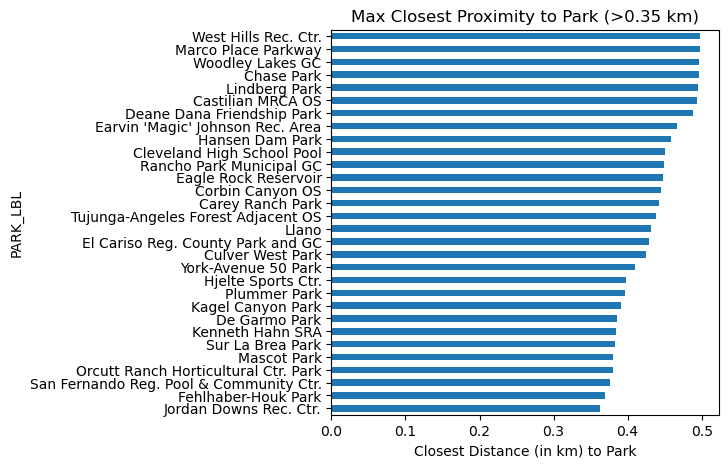

In [231]:

# plot  
plt.figure(figsize=(5, 5))
counts = df_park_close.groupby("PARK_LBL")["park_distance"].min()
counts = counts.sort_values(ascending=False)

top_counts = counts[:30,] 
ax = top_counts.plot(kind="barh")
plt.xlabel('Closest Distance (in km) to Park')
plt.title('Max Closest Proximity to Park (>0.35 km)')
ax.invert_yaxis()
#plt.tight_layout()
plt.show()

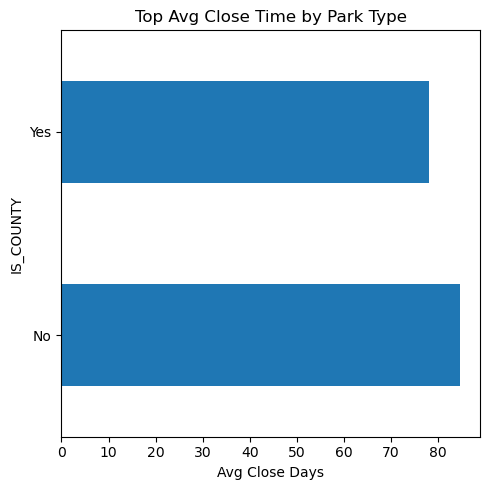

In [209]:

# plot  
plt.figure(figsize=(5, 5))
counts = df.groupby("IS_COUNTY")["close_time_days_x"].mean()
counts = counts.sort_values(ascending=False) 
ax = counts.plot(kind="barh")
plt.xlabel('Avg Close Days')
plt.title('Top Avg Close Time by Park Type')
#ax.invert_yaxis()
plt.tight_layout()
plt.show()

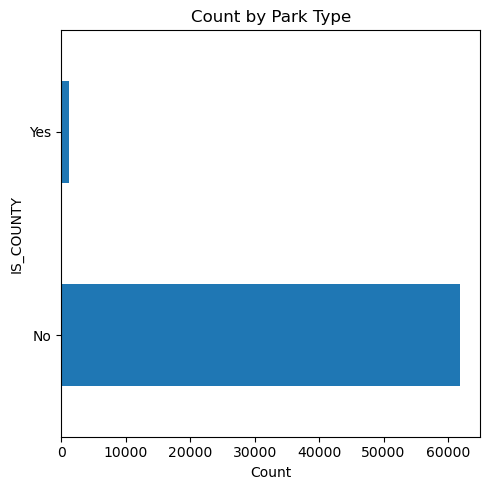

In [210]:

# plot  
plt.figure(figsize=(5, 5))
counts = df.groupby("IS_COUNTY")["IS_COUNTY"].count()
counts = counts.sort_values(ascending=False) 
ax = counts.plot(kind="barh")
plt.xlabel('Count')
plt.title('Count by Park Type')
#ax.invert_yaxis()
plt.tight_layout()
plt.show()

## Scale features for next step
<li> Closed in Number of Days</li>
<li> Park Distance (km)</li>

In [178]:
# add scaling
#todo: add scaling

# Min-Max Scaling
df['closed_days_scaled'] = (df['close_time_days_x'] - df['close_time_days_x'].min()) / (df['close_time_days_x'].max() - df['close_time_days_x'].min())

In [179]:
df['park_distance_scaled'] = (df['park_distance'] - df['park_distance'].min()) / (df['park_distance'].max() - df['park_distance'].min())

In [182]:
df.closed_days_scaled.min(), df.closed_days_scaled.max()

(np.float64(0.0), np.float64(1.0))

In [181]:
df.park_distance_scaled.min(), df.park_distance_scaled.max()

(np.float64(0.0), np.float64(1.0))

In [183]:
df['closed_days_scaled'].corr(df['park_distance_scaled'])

np.float64(0.021607863427792175)

In [184]:
# Save to file for next step ML
df.to_csv(generated_data_path +'homeless_camp_closed_2023_parks_ftr_eng_3.csv', index=False)

### Next Step: 5_ml.ipynb